In [12]:
import pandas as pd
import numpy as np


data = pd.read_csv("C:/Users/HP/Downloads/DataDNA.csv")
print(data.head())

X = data.iloc[:,0:-1]
y = data.iloc[:,-1]



   1  2  1.1  2.1  1.2  2.2  3  3.1  3.2  3.3  ...   3.8  2.19  3.9  4.6  \
0  3  3    4    2    1    2  2    4    3    2  ...     1     4    3    4   
1  4  1    4    4    4    4  1    1    2    1  ...     1     2    1    1   
2  1  4    1    1    3    3  4    4    3    4  ...     1     3    3    4   
3  3  4    4    3    1    1  4    4    4    1  ...     3     1    3    2   
4  3  2    3    1    2    3  4    3    1    4  ...     2     2    2    3   

   2.20  2.21  2.22  2.23  1.15  1.16  
0     4     4     1     3     4     1  
1     4     2     2     4     4     1  
2     1     3     3     4     2    -1  
3     1     4     2     1     1    -1  
4     4     2     2     2     2    -1  

[5 rows x 58 columns]


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.30, random_state=42)
print("done")

done


In [90]:
label_pos = data[data['1.16']==1].shape[0]
label_neg = data[data['1.16']==-1].shape[0]

class_zero_pos = (float(label_pos) / float(data.shape[0]))*100 
class_one_neg = (float(label_neg) / float(data.shape[0]))*100

print("Positive Class Percentage = ",class_zero_pos, "%")
print("Negative Class Percentage = ",class_one_neg, "%")

('Positive Class Percentage = ', 51.65984538426558, '%')
('Negative Class Percentage = ', 48.34015461573443, '%')


In [ ]:
# Explaination:
We are using z-score normalization over min-max normalization because we want our data to be distributed like a standard normal
distribution. In addition, there is no class imbalance in the data set as the percentage of positive class instances is simmilar
to negative class instances. Finally, we split train and test data set randomly becuase we want shuffling on data so that there 
is no class imbalance among the train and test sets.

('best_neighbor = ', {'n_neighbors': 11})
('accuracy list', [0.7244881253349994, 0.7361714199063645, 0.7381308557751383, 0.7433075261267992, 0.7485209160560826, 0.7439509285806388, 0.7342195195506962, 0.7277230480275483, 0.721225307417331, 0.7205856529677162, 0.7192810512125717, 0.717987841612561, 0.7121386094329534, 0.7127845994417518, 0.7069277576778088, 0.7101817018621546])


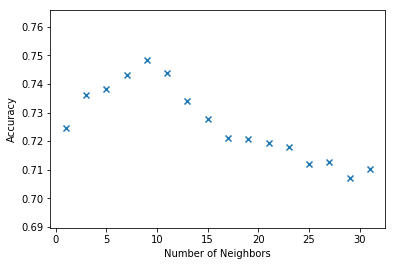

In [24]:
# Finding the best parameters for KNN classifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
neighbor_set = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
parameter = {'n_neighbors': neighbor_set}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn,parameter,cv=5)
clf_knn.fit(X_train,y_train)
best_neighbor = clf_knn.best_params_
print("best_neighbor = ",best_neighbor)

accuracy_list=[]

for i in range(0,len(neighbor_set)):
    knn = KNeighborsClassifier(n_neighbors=neighbor_set[i])
    accuracy = cross_val_score(knn,X_train,y_train,scoring='accuracy')
    accuracy_list.append( ( float(sum(accuracy)) / float(len(accuracy)) )   )
print("accuracy list", accuracy_list)

import matplotlib.pyplot as plt
plt.scatter(neighbor_set,accuracy_list,marker='x')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Explaination:
We didnot evaluate on the test set directly because this would result in less estimation of error. Cross validation results in 
reduction of overfitting and better generalization to newer instances/examples.

In [26]:
# Finding the best parameter set for SVM(RBF Kernel)
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

c_values = [0.1, 0.5, 1, 2, 5,10, 20, 50]
sigma_values = [0.01, 0.05, 0.1, 0.5, 1, 2, 5,10]

parameters = {'C' : c_values , 'gamma': sigma_values}
svc = SVC(kernel='rbf')
clf_svc = GridSearchCV(svc,parameters,cv=5,scoring = 'accuracy')
clf_svc.fit(X_train,y_train)
best_parameters = clf_svc.best_params_
print("Best Parameter Set = ",best_parameters)



('Best Parameter Set = ', {'C': 20, 'gamma': 0.01})


Text(0.5,1,'ROC')

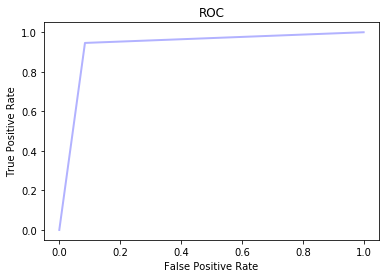

In [87]:
# Plotting the ROC Curve
from sklearn import metrics

svm = SVC(kernel='rbf',C=20,gamma=0.01)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, lw=2, alpha=0.3,color='blue')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')


In [91]:
# Training,Testing/Predicting  - KNN Classifier (1st Classifier)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

knn = KNeighborsClassifier(n_neighbors=11)
s1 = time.time()
knn.fit(X_train,y_train)
e1 = time.time()
s2=time.time()
y_pred = knn.predict(X_test)
e2 = time.time()
knn_score = accuracy_score(y_test,y_pred)
print("KNN-Score  = ",knn_score)
print("Train Time:", round(e1 - s1, 3),"s")
print("Test Time:", round(e2 - s2, 3),"s")


('KNN-Score  = ', 0.7866242038216561)
('Train Time:', 0.097, 's')
('Test Time:', 0.207, 's')


In [96]:
# Training,Testing/Predicting - SVM Classifier (2nd Classifier)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf',C=20,gamma=0.01)
s1 = time.time()
svm.fit(X_train,y_train)
e1 = time.time()
s2 = time.time()
y_pred = svm.predict(X_test)
e2 = time.time()
svm_score = accuracy_score(y_test,y_pred)
print("SVM-Score = ",svm_score)
print("Train Time:", round(e1 - s1, 3),"s")
print("Test Time:", round(e2 - s2, 3),"s")


('SVM-Score = ', 0.9299363057324841)
('Train Time:', 0.51, 's')
('Test Time:', 0.057, 's')


In [112]:
# Training,Testing/Predicting - Random Forest Classifier (Default Parameters) (3rd Classifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier()
s1 = time.time()
forest.fit(X_train,y_train)
e1 = time.time()
s2 = time.time()
y_pred = forest.predict(X_test)
e2 = time.time()
forest_score = accuracy_score(y_test,y_pred)
print("Forest-Score = ",forest_score)
print("Train Time:", round(e1 - s1, 3),"s")
print("Test Time:", round(e2 - s2, 3),"s")

('Forest-Score = ', 0.945859872611465)
('Train Time:', 0.129, 's')
('Test Time:', 0.003, 's')


In [98]:
# Training,Testing/Predicting - Neural Networks(Default Parameters)  (4th Classifier)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

neural_net = MLPClassifier()
s1 = time.time()
neural_net.fit(X_train,y_train)
e1 = time.time()
s2 = time.time()
y_pred = neural_net.predict(X_test)
e2 = time.time()
neural_net_score = accuracy_score(y_test,y_pred)
print("Neural Network - Score = ",neural_net_score)
print("Train Time:", round(e1 - s1, 3),"s")
print("Test Time:", round(e2 - s2, 3),"s")

('Neural Network - Score = ', 0.9044585987261147)
('Train Time:', 2.65, 's')
('Test Time:', 0.004, 's')


In [32]:
# Finding the best parameter set for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [1,3,5,7,10,12,15,20,25], 'criterion' : ('gini','entropy'), 'max_depth' : [1,2,5,10,15,None],'max_features':('auto','sqrt','log2',None),'bootstrap':(True,False)}
forest = RandomForestClassifier(random_state=0)
clf_forest = GridSearchCV(forest,parameters,cv=5)
clf_forest.fit(X_train,y_train)
best_parameters = clf_forest.best_params_
print(best_parameters)

{'max_features': 'auto', 'n_estimators': 20, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 10}


In [110]:
# Training,Testing/Predicting - Random Forest Classifier (Optimal Parameters) (5th Classifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion= 'gini',random_state=0,n_estimators=20,max_features='auto',max_depth=10,bootstrap=False)
s1 = time.time()
forest.fit(X_train,y_train)
e1 = time.time()
s2 = time.time()
y_pred = forest.predict(X_test)
e2 = time.time()
forest_score = accuracy_score(y_test,y_pred)
print("Optimal Forest-Score = ",forest_score)
print("Train Time:", round(e1 - s1, 3),"s")
print("Test Time:", round(e2 - s2, 3),"s")

('Optimal Forest-Score = ', 0.9585987261146497)
('Train Time:', 0.212, 's')
('Test Time:', 0.005, 's')


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes': (10,10,5,10), 
    'random_state':[0,1]
}
neural_net = MLPClassifier()
clf_net = GridSearchCV(neural_net, parameters, n_jobs=-1)
clf_net.fit(X_train,y_train)
best_parameters = clf_net.best_params_
print("Best Parameters = ",best_parameters)

('Best Parameters = ', {'alpha': 0.001, 'activation': 'relu', 'random_state': 1, 'solver': 'lbfgs', 'hidden_layer_sizes': 10})


In [105]:
# Training,Testing/Predicting - Neural Network Classifier (Optimal Parameters) (6th Classifier)
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score

neural_net = MLPClassifier(alpha=0.001,activation = 'relu',random_state=1,solver='lbfgs',hidden_layer_sizes=(100,))
s1 = time.time()
neural_net.fit(X_train,y_train)
e1 = time.time()
s2 = time.time()
y_pred = neural_net.predict(X_test)
e2 = time.time()
neural_net_score = accuracy_score(y_test,y_pred)
print("Optimized Neural Network - Score = ",neural_net_score)
print("Train Time:", round(e1 - s1, 3),"s")
print("Test Time:", round(e2 - s2, 3),"s")

('Optimized Neural Network - Score = ', 0.910828025477707)
('Train Time:', 0.283, 's')
('Test Time:', 0.001, 's')


In [62]:
# Averages and Deviations for different Metrics (1st Classifier)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


accuracy_list=[]
precision_list=[]
recall_list=[]
F_list=[]
splits_list = [4,5,6,7]

for i in range(0,len(splits_list)):
    kf = KFold(n_splits=splits_list[i]) 

    for j in range(0,20): 
        for train_index, test_index in kf.split(X):
        
            X_train, X_test = X.values[train_index], X.values[test_index]
            y_train, y_test = y.values[train_index], y.values[test_index]
            knn = KNeighborsClassifier(n_neighbors=11)
            knn.fit(X_train,y_train)
            y_pred = knn.predict(X_test)
            knn_acc = accuracy_score(y_test,y_pred)
            accuracy_list.append(knn_acc)
            knn_pre = precision_score(y_test,y_pred)
            precision_list.append(knn_pre)
            knn_rec = recall_score(y_test,y_pred)
            recall_list.append(knn_rec)
            knn_f  =  f1_score(y_test,y_pred)
            F_list.append(knn_f)

            
print("Average Accuracy = ",np.mean((np.array(accuracy_list))) )
print("Standard Deviation Accuracy = ",np.std((np.array(accuracy_list))))

print("Average Precision = ",np.mean((np.array(precision_list))) )
print("Standard Deviation Precision = ",np.std((np.array(precision_list))))

print("Average Recall = ",np.mean((np.array(recall_list))) )
print("Standard Deviation Recall = ",np.std((np.array(recall_list))))

print("Average F Score = ",np.mean((np.array(F_list))) )
print("Standard Deviation F Score = ",np.std((np.array(F_list))))



('Average Accuracy = ', 0.753820417917727)
('Standard Deviation Accuracy = ', 0.025650254121647755)
('Average Precision = ', 0.9512175167117545)
('Standard Deviation Precision = ', 0.022747468158357636)
('Average Recall = ', 0.5526222376897526)
('Standard Deviation Recall = ', 0.03775124202819243)
('Average F Score = ', 0.6982743480457662)
('Standard Deviation F Score = ', 0.031064680904035125)


In [63]:
# Averages and Deviations for different Metrics (2nd Classifier)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import numpy as np


accuracy_list=[]
precision_list=[]
recall_list=[]
F_list=[]
splits_list = [4,5,6,7]

for i in range(0,len(splits_list)):
    kf = KFold(n_splits=splits_list[i]) 

    for j in range(0,20): 
        for train_index, test_index in kf.split(X):
        
            X_train, X_test = X.values[train_index], X.values[test_index]
            y_train, y_test = y.values[train_index], y.values[test_index]
            svm = SVC(kernel='rbf',C=20,gamma=0.01)
            svm.fit(X_train,y_train)
            y_pred = svm.predict(X_test)
            svm_acc = accuracy_score(y_test,y_pred)
            accuracy_list.append(svm_acc)
            svm_pre = precision_score(y_test,y_pred)
            precision_list.append(svm_pre)
            svm_rec = recall_score(y_test,y_pred)
            recall_list.append(svm_rec)
            svm_f  =  f1_score(y_test,y_pred)
            F_list.append(svm_f)

            
print("Average Accuracy = ",np.mean((np.array(accuracy_list))) )
print("Standard Deviation Accuracy = ",np.std((np.array(accuracy_list))))

print("Average Precision = ",np.mean((np.array(precision_list))) )
print("Standard Deviation Precision = ",np.std((np.array(precision_list))))

print("Average Recall = ",np.mean((np.array(recall_list))) )
print("Standard Deviation Recall = ",np.std((np.array(recall_list))))

print("Average F Score = ",np.mean((np.array(F_list))) )
print("Standard Deviation F Score = ",np.std((np.array(F_list))))



('Average Accuracy = ', 0.9027156368511134)
('Standard Deviation Accuracy = ', 0.017663920623134714)
('Average Precision = ', 0.921350573324545)
('Standard Deviation Precision = ', 0.02569325974288477)
('Average Recall = ', 0.8885811059148636)
('Standard Deviation Recall = ', 0.029989615021141235)
('Average F Score = ', 0.9041336687154403)
('Standard Deviation F Score = ', 0.01712186074987965)


In [64]:
# Averages and Deviations for different Metrics (3rd Classifier)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


accuracy_list=[]
precision_list=[]
recall_list=[]
F_list=[]
splits_list = [4,5,6,7]

for i in range(0,len(splits_list)):
    kf = KFold(n_splits=splits_list[i]) 

    for j in range(0,20): 
        for train_index, test_index in kf.split(X):
        
            X_train, X_test = X.values[train_index], X.values[test_index]
            y_train, y_test = y.values[train_index], y.values[test_index]
            forest = RandomForestClassifier(random_state=0)
            forest.fit(X_train,y_train)
            y_pred = forest.predict(X_test)
            forest_acc = accuracy_score(y_test,y_pred)
            accuracy_list.append(forest_acc)
            forest_pre = precision_score(y_test,y_pred)
            precision_list.append(forest_pre)
            forest_rec = recall_score(y_test,y_pred)
            recall_list.append(forest_rec)
            forest_f  =  f1_score(y_test,y_pred)
            F_list.append(forest_f)

            
print("Average Accuracy = ",np.mean((np.array(accuracy_list))) )
print("Standard Deviation Accuracy = ",np.std((np.array(accuracy_list))))

print("Average Precision = ",np.mean((np.array(precision_list))) )
print("Standard Deviation Precision = ",np.std((np.array(precision_list))))

print("Average Recall = ",np.mean((np.array(recall_list))) )
print("Standard Deviation Recall = ",np.std((np.array(recall_list))))

print("Average F Score = ",np.mean((np.array(F_list))) )
print("Standard Deviation F Score = ",np.std((np.array(F_list))))



('Average Accuracy = ', 0.9355813592745502)
('Standard Deviation Accuracy = ', 0.018427829366581848)
('Average Precision = ', 0.9699956722290802)
('Standard Deviation Precision = ', 0.0171367448971743)
('Average Recall = ', 0.9039348735111813)
('Standard Deviation Recall = ', 0.027033754922418836)
('Average F Score = ', 0.9355796023650377)
('Standard Deviation F Score = ', 0.018031325750435142)


In [65]:
# Averages and Deviations for different Metrics (4th Classifier)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

import numpy as np


accuracy_list=[]
precision_list=[]
recall_list=[]
F_list=[]
splits_list = [4,5,6,7]

for i in range(0,len(splits_list)):
    kf = KFold(n_splits=splits_list[i]) 

    for j in range(0,20): 
        for train_index, test_index in kf.split(X):
        
            X_train, X_test = X.values[train_index], X.values[test_index]
            y_train, y_test = y.values[train_index], y.values[test_index]
            nn = MLPClassifier()
            nn.fit(X_train,y_train)
            y_pred = nn.predict(X_test)
            nn_acc = accuracy_score(y_test,y_pred)
            accuracy_list.append(nn_acc)
            nn_pre = precision_score(y_test,y_pred)
            precision_list.append(nn_pre)
            nn_rec = recall_score(y_test,y_pred)
            recall_list.append(nn_rec)
            nn_f  =  f1_score(y_test,y_pred)
            F_list.append(nn_f)

            
print("Average Accuracy = ",np.mean((np.array(accuracy_list))) )
print("Standard Deviation Accuracy = ",np.std((np.array(accuracy_list))))

print("Average Precision = ",np.mean((np.array(precision_list))) )
print("Standard Deviation Precision = ",np.std((np.array(precision_list))))

print("Average Recall = ",np.mean((np.array(recall_list))) )
print("Standard Deviation Recall = ",np.std((np.array(recall_list))))

print("Average F Score = ",np.mean((np.array(F_list))) )
print("Standard Deviation F Score = ",np.std((np.array(F_list))))



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


('Average Accuracy = ', 0.9001598041364567)
('Standard Deviation Accuracy = ', 0.022365156491323753)
('Average Precision = ', 0.9175258276713423)
('Standard Deviation Precision = ', 0.0269006961080435)
('Average Recall = ', 0.8868319934135459)
('Standard Deviation Recall = ', 0.029963930349820773)
('Average F Score = ', 0.901578729247026)
('Standard Deviation F Score = ', 0.022451937573698212)


In [66]:
# Averages and Deviations for different Metrics (5th Classifier)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


accuracy_list=[]
precision_list=[]
recall_list=[]
F_list=[]
splits_list = [4,5,6,7]

for i in range(0,len(splits_list)):
    kf = KFold(n_splits=splits_list[i]) 

    for j in range(0,20): 
        for train_index, test_index in kf.split(X):
        
            X_train, X_test = X.values[train_index], X.values[test_index]
            y_train, y_test = y.values[train_index], y.values[test_index]
            forest = RandomForestClassifier(criterion= 'gini',random_state=0,n_estimators=20,max_features='auto',max_depth=10,bootstrap=False)
            forest.fit(X_train,y_train)
            y_pred = forest.predict(X_test)
            forest_acc = accuracy_score(y_test,y_pred)
            accuracy_list.append(forest_acc)
            forest_pre = precision_score(y_test,y_pred)
            precision_list.append(forest_pre)
            forest_rec = recall_score(y_test,y_pred)
            recall_list.append(forest_rec)
            forest_f  =  f1_score(y_test,y_pred)
            F_list.append(forest_f)

            
print("Average Accuracy = ",np.mean((np.array(accuracy_list))) )
print("Standard Deviation Accuracy = ",np.std((np.array(accuracy_list))))

print("Average Precision = ",np.mean((np.array(precision_list))) )
print("Standard Deviation Precision = ",np.std((np.array(precision_list))))

print("Average Recall = ",np.mean((np.array(recall_list))) )
print("Standard Deviation Recall = ",np.std((np.array(recall_list))))

print("Average F Score = ",np.mean((np.array(F_list))) )
print("Standard Deviation F Score = ",np.std((np.array(F_list))))



('Average Accuracy = ', 0.9601745923017476)
('Standard Deviation Accuracy = ', 0.012460986957900048)
('Average Precision = ', 0.9734800436039744)
('Standard Deviation Precision = ', 0.016801971056152318)
('Average Recall = ', 0.9489097429785305)
('Standard Deviation Recall = ', 0.01725415734883057)
('Average F Score = ', 0.9608902951974302)
('Standard Deviation F Score = ', 0.012211836428435017)


In [68]:
# Averages and Deviations for different Metrics (6th Classifier)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

import numpy as np


accuracy_list=[]
precision_list=[]
recall_list=[]
F_list=[]
splits_list = [4,5,6,7]

for i in range(0,len(splits_list)):
    kf = KFold(n_splits=splits_list[i]) 

    for j in range(0,20): 
        for train_index, test_index in kf.split(X):
        
            X_train, X_test = X.values[train_index], X.values[test_index]
            y_train, y_test = y.values[train_index], y.values[test_index]
            nn = MLPClassifier(alpha=0.001,activation = 'relu',random_state=1,solver='lbfgs',hidden_layer_sizes=(100,))
            nn.fit(X_train,y_train)
            y_pred = nn.predict(X_test)
            nn_acc = accuracy_score(y_test,y_pred)
            accuracy_list.append(nn_acc)
            nn_pre = precision_score(y_test,y_pred)
            precision_list.append(nn_pre)
            nn_rec = recall_score(y_test,y_pred)
            recall_list.append(nn_rec)
            nn_f  =  f1_score(y_test,y_pred)
            F_list.append(nn_f)

            
print("Average Accuracy = ",np.mean((np.array(accuracy_list))) )
print("Standard Deviation Accuracy = ",np.std((np.array(accuracy_list))))

print("Average Precision = ",np.mean((np.array(precision_list))) )
print("Standard Deviation Precision = ",np.std((np.array(precision_list))))

print("Average Recall = ",np.mean((np.array(recall_list))) )
print("Standard Deviation Recall = ",np.std((np.array(recall_list))))

print("Average F Score = ",np.mean((np.array(F_list))) )
print("Standard Deviation F Score = ",np.std((np.array(F_list))))



('Average Accuracy = ', 0.9095357201719575)
('Standard Deviation Accuracy = ', 0.019672627432528768)
('Average Precision = ', 0.920843520475066)
('Standard Deviation Precision = ', 0.025120390635659098)
('Average Recall = ', 0.9024825257251476)
('Standard Deviation Recall = ', 0.024060055393685994)
('Average F Score = ', 0.9113445782017302)
('Standard Deviation F Score = ', 0.019936588921653658)


In [ ]:
# Explaination
KNN:
    Across all the classifiers KNN has the minimum training time because it doesnot require training at all because all the 
    classification is done during test where pair wise distances are calculated depending upon the number of neighbors. As a
    result of this, KNN has the maximum testing time of about 0.207 seconds. It also offers a poor average accuracy of about 75 %.
    The only positive is its minimal training time.
SVM:
    SVM has a decent but not the most optimal performance across all the six classifiers. It has an average accuracy of about 90 %
    with a significantly less testing time of about 0.057 seconds as compared to KNN. However, its training time is significantly
    higher than four out of the remaining six. Nonetheless, it is a parametric model with a reasonable high accuracy.
Random Forest (Default Parameters):
    Random Forest with default parameters has a significantly high accuracy of about 94 % and a low training and testing time of
    0.129 seconds and 0.003 seconds respectively. It is an ensemble method therefore it performs a lot better than most of the
    other classifiers present. However, its accuracy is still not optimal and can be improved upto an extent.
Neural Networks (Default Parameters):
    Neural Networks with default parameters have a daunting training time of about 2.65 seconds. Eventhough, the testing time of
    0.004 seconds is less and accuracy of 90 % is decent but with a such a large training time, the classifier is obviously not
    the perfect choice for the data set.
Random Forest (Optimal Parameters):
    Random Forests with optimal parameters is by far the best choice in terms of accuracy. It has an impressive average accuracy
    of about 96%. In addition, it has a reasonable training time of 0.212 seconds and testing time of 0.005 seconds. This makes
    it perhaps the best of the rest of the six classifiers.
Neural Networks (Optimal Parameters):
    Neural Networks with optimal parameters is a huge improvement from its default parameters version. It now has an increased 
    accuracy of 91 % and a significantly reduced (about 10 times) training time of 0.283 seconds and smallest testing time of 
    0.001 seconds. However,its training time is still very high as compared to the other five classifiers.
Result:
    According to the time and accuracy analysis, Random Forests with optimal parameters is the go to choice with the data set 
    at hand. It has the best accuracy beating the second highest with about 2 % and extremely low testing time and a more
    than decent training time. It is no doubt the best pick out of all the six classifiers.
    

In [ ]:
# Explaination:
We have repeated the classification 20 times to make sure that the entire volume of data is used as the training and test set
respectively so that the models do not overfit to particular part of the data and generalize to the new inputs given in the 
future.

In [79]:
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X.values, y.values)
importances = list(forest.feature_importances_)
print("Importances = ",importances)
unimportant = importances.index(min(importances))
feature_names = list(data)
print("Least Important Feature Number = ",feature_names[unimportant])


('Importances = ', [0.007331042336518689, 0.0068368122544985805, 0.007563641949898216, 0.008198187272377113, 0.0075200522077407085, 0.00708031217951373, 0.007195155292274915, 0.008848622168875274, 0.009012104590641584, 0.0075757327018675215, 0.007531604256753403, 0.009904065124597777, 0.008977004239565801, 0.008637127909998484, 0.013414559765739022, 0.010250986045963698, 0.01253725368718682, 0.013885834314140746, 0.014915120486398573, 0.013692447370236364, 0.014737757973785333, 0.016437654417548547, 0.010904229609143652, 0.01941914892970433, 0.016803984770771187, 0.007288342410537013, 0.03488847640783015, 0.13740414172828277, 0.12773907653218863, 0.0766217451742689, 0.08471711087393756, 0.026486991205435892, 0.031113346019253016, 0.02781643382652445, 0.012649392138739793, 0.007814936056262448, 0.006842647748738247, 0.00798065796560796, 0.00787726281818683, 0.007792267471480653, 0.007526919405026737, 0.008113291172795373, 0.006950697819236363, 0.007812276422475577, 0.007383898296603472,

In [ ]:
# Explaination:
We have removed feature number 2 because it has the minimal importance when compared with all the other features in the data.

If we would have done classification on two features then these two features would have been the ones with the maximum importnace
which are features 27 and 28 with a combined importance of about 25% of the entire data. This would have resulted in loss of
some important information and would have resulted in less accuracy.